## Tommy's Optimal Portfolio 

- Using just your assets I will find where the capital market line is tangent to the efficient frontier. The optimal combination of a set of portfolios that offer the lowest risk for a given return and the highest return for a given amount of risk is the **efficient frontier.** The *line* that is drawn tangently to the efficient frontier from the rate of return that is the risk-free is the capital makret line. 

-This **Tangency Portfolio** I find maximizes the Sharpe ratio.


$\underset{x_{1},x_{2},...,x_{N}}{\max}~\mathrm{SR}_{p}=\frac{\mu_{p}-r_{f}}{\sigma_{p}}$


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import seaborn as sns
import yfinance as yf
import scipy as scs

In [2]:
plt.style.use("seaborn")
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [24]:
# Getting Data
tickers = "AAPL MSFT GS VYM XOM JPM WTRG OXY ^GSPC BUD VNQ HD NFLX"
start = "2003-01-01"
end = "2022-12-01"
adj_close = pd.DataFrame(yf.download(tickers, start, end)["Adj Close"])
adj_close.dropna(inplace = True)
adj_close.columns = ["Apple", "Budweiser", "Goldman", "Home Depot", "JP Morgan", "Microsoft", "Netflix", "Occidental Petroleum","Vanguard Real Estate", "Vanguard High Dividend","Essential Utilities", "Exxon", "S&P 500"]


[*********************100%***********************]  13 of 13 completed


array([[<AxesSubplot:title={'center':'Apple'}>,
        <AxesSubplot:title={'center':'Budweiser'}>,
        <AxesSubplot:title={'center':'Goldman'}>,
        <AxesSubplot:title={'center':'Home Depot'}>],
       [<AxesSubplot:title={'center':'JP Morgan'}>,
        <AxesSubplot:title={'center':'Microsoft'}>,
        <AxesSubplot:title={'center':'Netflix'}>,
        <AxesSubplot:title={'center':'Occidental Petroleum'}>],
       [<AxesSubplot:title={'center':'Vanguard Real Estate'}>,
        <AxesSubplot:title={'center':'Vanguard High Dividend'}>,
        <AxesSubplot:title={'center':'Essential Utilities'}>,
        <AxesSubplot:title={'center':'Exxon'}>],
       [<AxesSubplot:title={'center':'S&P 500'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

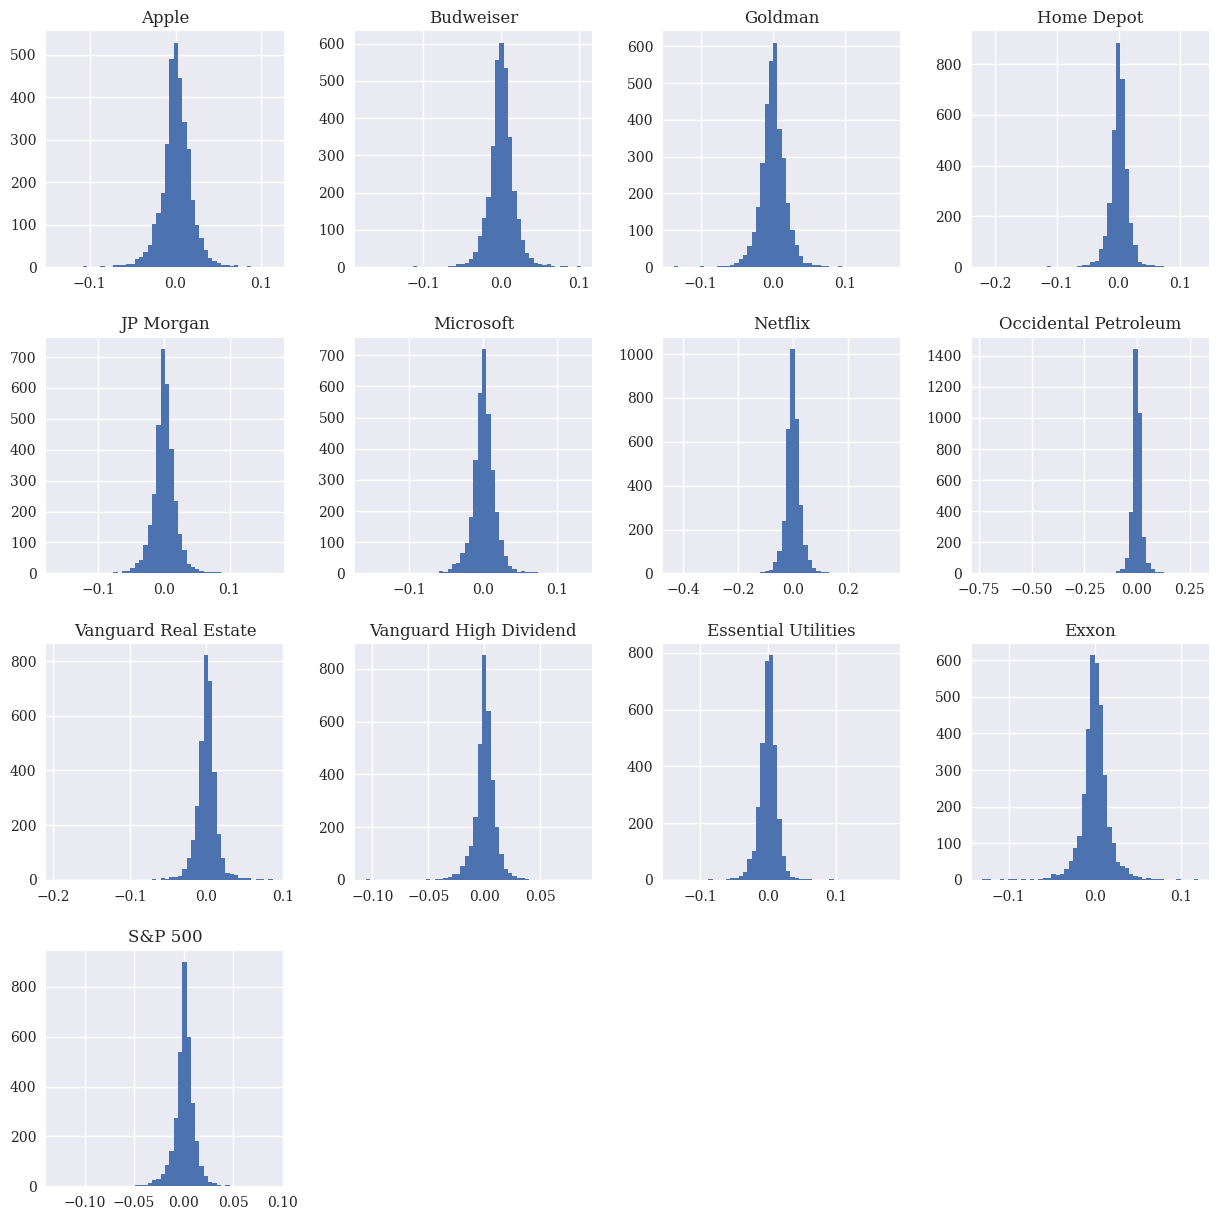

In [25]:
# Computing Log Returns
noa = 13
log_returns = np.log(adj_close/adj_close.shift(1))
log_returns.dropna(inplace = True)
log_returns.hist(bins = 50, figsize = (15,15))

Text(0.5, 1.0, 'Value of $1 Dollar Invested')

<Figure size 2000x1500 with 0 Axes>

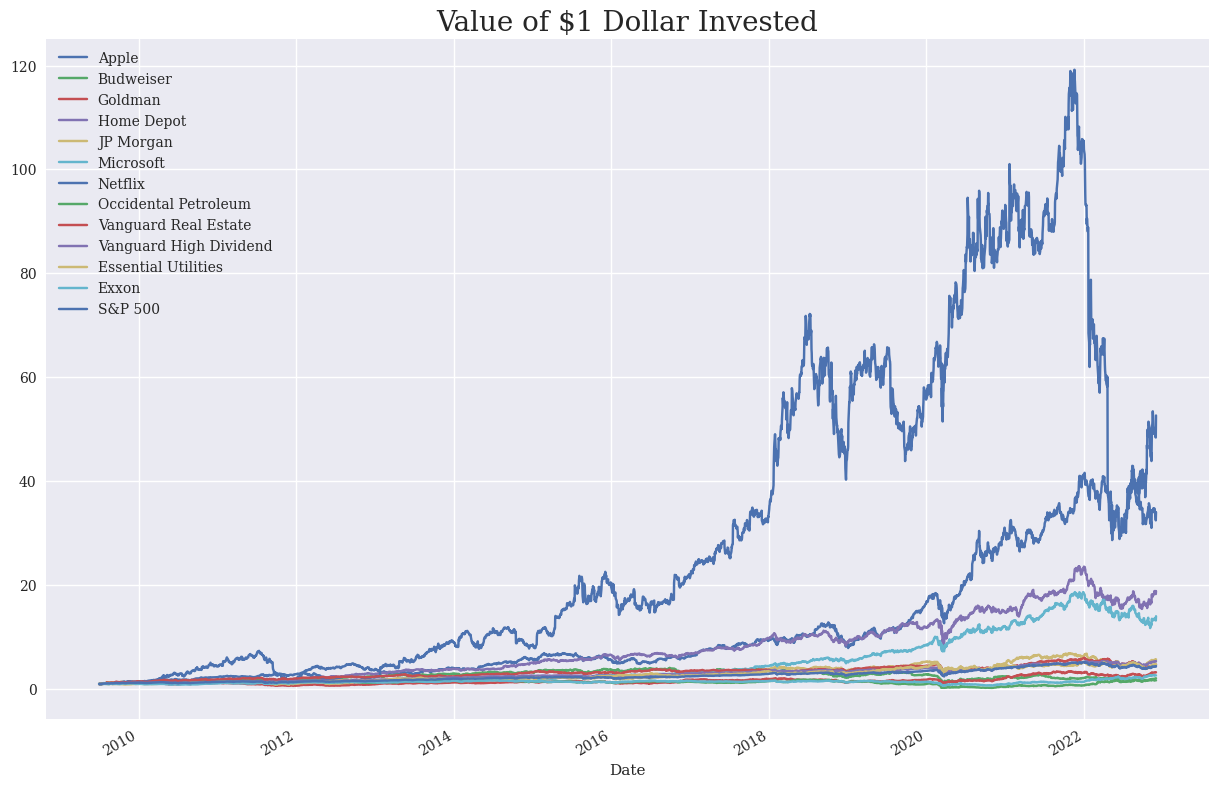

In [26]:
plt.figure(figsize = (20,15))
log_returns.cumsum().apply(np.exp).plot(figsize = (15,10))
plt.title("Value of $1 Dollar Invested", size = 20)

In [27]:
#Annualized Return
log_returns.mean()*252

Apple                     0.263163
Budweiser                 0.054211
Goldman                   0.087571
Home Depot                0.219090
JP Morgan                 0.130062
Microsoft                 0.196924
Netflix                   0.295693
Occidental Petroleum      0.038486
Vanguard Real Estate      0.114991
Vanguard High Dividend    0.125380
Essential Utilities       0.116498
Exxon                     0.072114
S&P 500                   0.110848
dtype: float64

In [28]:
#Covariance Matrix
log_returns.cov()*252

,Apple,Budweiser,Goldman,Home Depot,JP Morgan,Microsoft,Netflix,Occidental Petroleum,Vanguard Real Estate,Vanguard High Dividend,Essential Utilities,Exxon,S&P 500
Apple,0.081787,0.025444,0.036871,0.032133,0.034408,0.043841,0.043446,0.037329,0.028563,0.026709,0.021362,0.024296,0.035056
Budweiser,0.025444,0.072542,0.035700,0.027151,0.037849,0.026510,0.023464,0.047135,0.029708,0.026260,0.020998,0.030136,0.027965
Goldman,0.036871,0.035700,0.085302,0.035367,0.069279,0.037271,0.036319,0.061437,0.035553,0.035107,0.022771,0.039750,0.038565
Home Depot,0.032133,0.027151,0.035367,0.056047,0.035623,0.033098,0.031534,0.034225,0.031399,0.026527,0.024137,0.023758,0.030611
JP Morgan,0.034408,0.037849,0.069279,0.035623,0.083073,0.036050,0.030763,0.066247,0.038471,0.037077,0.025774,0.041625,0.039214
Microsoft,0.043841,0.026510,0.037271,0.033098,0.036050,0.067384,0.045943,0.035947,0.029234,0.027896,0.023397,0.024780,0.035059
Netflix,0.043446,0.023464,0.036319,0.031534,0.030763,0.045943,0.269222,0.029571,0.025444,0.023825,0.017643,0.018754,0.034548
Occidental Petroleum,0.037329,0.047135,0.061437,0.034225,0.066247,0.035947,0.029571,0.207083,0.042682,0.042898,0.028963,0.081763,0.042975
Vanguard Real Estate,0.028563,0.029708,0.035553,0.031399,0.038471,0.029234,0.025444,0.042682,0.048401,0.027620,0.031597,0.026949,0.030288
Vanguard High Dividend,0.026709,0.026260,0.035107,0.026527,0.037077,0.027896,0.023825,0.042898,0.027620,0.026276,0.022785,0.029551,0.027498


## Generating Risk-Return Profiles for a given allocation of Assets 

**Here I simulate allocations and the code records the resulting expected portfolio return and variance.** 

In [29]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [30]:
def port_ret(weights):
    return np.sum(log_returns.mean() *weights)*252
def port_vol(weights):
    return np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252, weights)))
prets = []
pvols = []
for p in range(8000):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

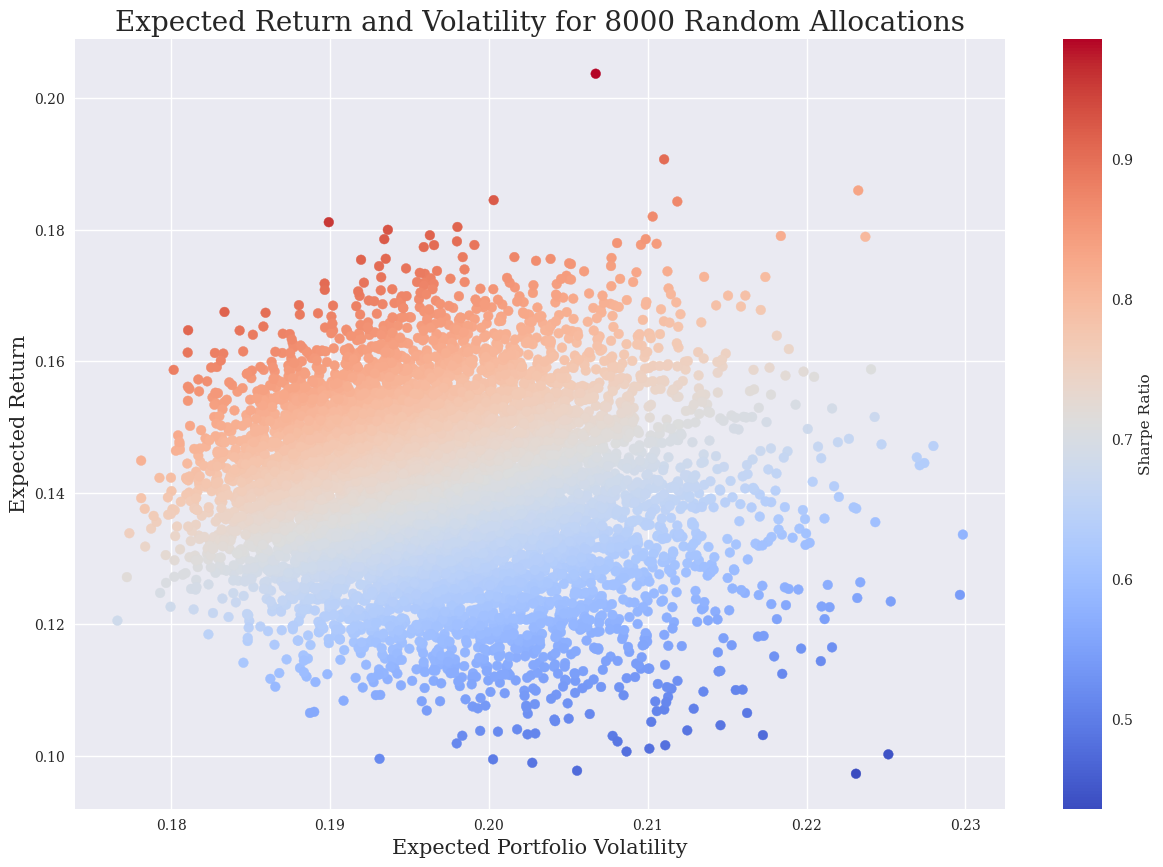

In [31]:
from scipy.ndimage import label


plt.figure(figsize = (15,10))
plt.scatter(pvols, prets, c = prets/pvols,marker = 'o', cmap = "coolwarm")
plt.xlabel("Expected Portfolio Volatility", fontsize = 15)
plt.ylabel("Expected Return", fontsize = 15)
plt.title("Expected Return and Volatility for 8000 Random Allocations", size = 20)
plt.colorbar(label = "Sharpe Ratio")
plt.show()

## Finding the Efficient Frontier


In [32]:
import scipy.optimize as sco

def min_func_sharpe(weights):
    return -port_ret(weights)/port_vol(weights)
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})
bnds = tuple((0,1) for x in range(noa))
eweights = np.array(noa*[1./noa,])
eweights
min_func_sharpe(eweights)

-0.7244090618623941

In [33]:
opts = sco.minimize(min_func_sharpe, eweights, method = "SLSQP", constraints = cons)
pd.DataFrame(opts['x'].round(3), index = ["Apple", "Budweiser", "Goldman", "Home Depot", "JP Morgan", "Microsoft", "Netflix", "Occidental Petroleum", "Vanguard Real Estate", "Vanguard High Dividend","Essential Utilities", "Exxon", "S&P 500"], columns = ["Weights"])

,Weights
Apple,0.749
Budweiser,-0.149
Goldman,-0.198
Home Depot,0.658
JP Morgan,0.167
Microsoft,0.508
Netflix,0.185
Occidental Petroleum,-0.088
Vanguard Real Estate,0.060
Vanguard High Dividend,4.347


In [34]:
print("The resulting portfolio return and portfolio volatility from the optimal weights are", np.round(port_ret(opts['x']),4), "and",np.round(port_vol(opts["x"]),4), "respectively.")

The resulting portfolio return and portfolio volatility from the optimal weights are 0.4661 and 0.2672 respectively.


- Here I will compute the **Minimization of the Variance** *for  given allocation.*

You see that some of these weights are **negative** this is because if you were *short* meaning a negative allocation and long on the other's you **maximize** the sharpe ratio for that particular given **allocation**. You'll see below that we will eliminate this assumption so that you are only in **long positions.**

In [35]:
optv = sco.minimize(port_vol, eweights, method = "SLSQP", bounds = bnds, constraints = cons)
pd.DataFrame(optv['x'].round(3), index = ["Apple", "Budweiser", "Goldman", "Home Depot", "JP Morgan", "Microsoft", "Netflix", "Occidental Petroleum", "Vanguard Real Estate", "Vanguard High Dividend","Essential Utilities", "Exxon", "S&P 500"], columns = ["Weights"])


,Weights
Apple,0.000
Budweiser,0.005
Goldman,0.000
Home Depot,0.000
JP Morgan,0.000
Microsoft,0.000
Netflix,0.011
Occidental Petroleum,0.000
Vanguard Real Estate,0.000
Vanguard High Dividend,0.876


This makes sense because obviously a TIP fund is way less volatile, hence you will minimize your portfolio variance a.k.a **risk.** 

In [36]:
print("Expected return", port_ret(optv['x']),"and minimizing portfolio volatility is", port_vol(optv['x']))

Expected return 0.12589620235555074 and minimizing portfolio volatility is 0.16084377952144


- The expected return for maximized return for the best *sharpe ratio*  is about $\mu_{p} = 0.452$ with a portfolio variance of  $\sigma_{p} = .1602$

- The expected return for the minimum variance portfolio about $\mu_{p} = 0.1205$ with a minimum variance of $\sigma_{p} = 0.15958$. 

            Your portfolio has high volatility, which is not necessarily a bad thing. 



## Graph of Efficient Frontier


In [37]:
cons = ({'type':'eq', 'fun': lambda x: port_ret(x)-tret}, {'type':'eq', 'fun': lambda x: np.sum(x)-1})
bnds = tuple((0,1)for x in weights)
trets = np.linspace(.04,.2,50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol,eweights, method = "SLSQP", bounds = bnds, constraints = cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

Text(0.5, 1.0, 'Efficient Frontier for Given Risk Level ')

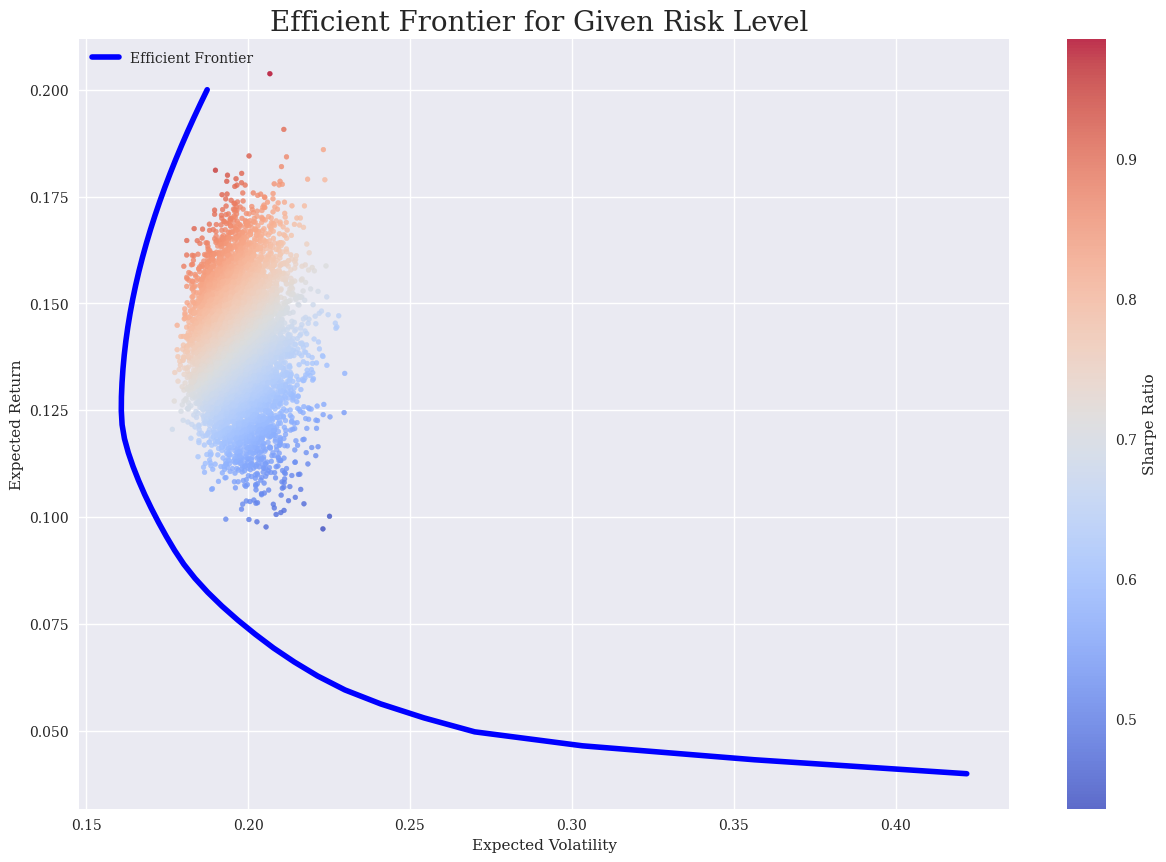

In [38]:
plt.figure(figsize = (15,10))
plt.scatter(pvols, prets, c = prets/pvols, marker = '.', alpha = 0.8, cmap = 'coolwarm')
plt.plot(tvols, trets, 'b',label = "Efficient Frontier",lw =4.0)
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.legend(loc = "upper left")
plt.colorbar(label = "Sharpe Ratio")
plt.title("Efficient Frontier for Given Risk Level ", fontsize = 20)

## Capital Market Line and Efficient Frontier for Optimal Portfolio

In [39]:
import scipy.interpolate as sci
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]
tck = sci.splrep(evols, erets)

def f(x):
    return sci.splev(x, tck, der = 0)
def df(x):
    #First derivative of efficient frontier
    return sci.splev(x,tck, der = 1)

In [40]:
def equations(p, rf = 0.01):
    eq1 = rf - p[0]
    eq2 = rf +p[1]*p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3
opt = sco.fsolve(equations, [.01,.5,.15])   

np.round(equations(opt), 6)

array([ 0.,  0., -0.])

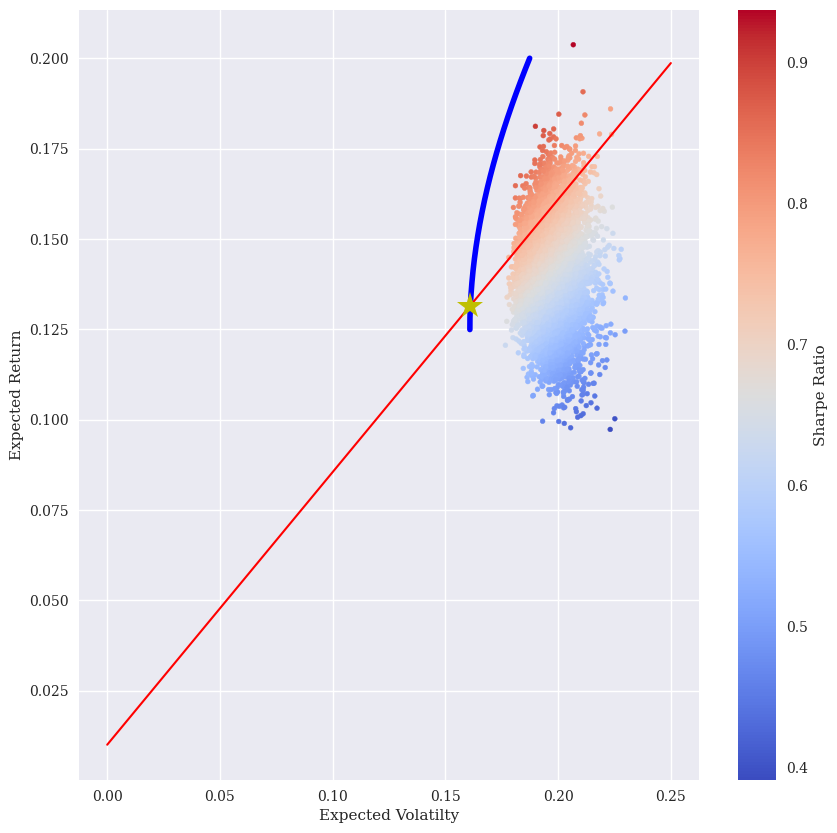

In [41]:
plt.figure(figsize = (10,10))
plt.plot(evols, erets, 'b', lw=4, label = "Efficient Frontier")
plt.scatter(pvols,prets, c = (prets -.01)/pvols,marker = '.', cmap = 'coolwarm')
cx = np.linspace(0,.250)
plt.plot(cx, opt[0]+opt[1]*cx, 'r', lw =1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize = 20.0)
plt.grid(True)
plt.xlabel("Expected Volatilty")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")

In [42]:
cons = ({'type':'eq', 'fun': lambda x: port_ret(x)-f(opt[2])}, {'type':'eq', 'fun': lambda x: np.sum(x)-1})
res = sco.minimize(port_vol, eweights, method = "SLSQP", bounds = bnds, constraints = cons)

pd.DataFrame(res['x'].round(3), index =["Apple", "Budweiser", "Goldman", "Home Depot", "JP Morgan", "Microsoft", "Netflix", "Occidental Petroleum", "Vanguard Real Estate", "Vanguard High Dividend","Essential Utilities", "Exxon", "S&P 500"] , columns = ["Weights"])

,Weights
Apple,0.017
Budweiser,0.000
Goldman,0.000
Home Depot,0.020
JP Morgan,0.000
Microsoft,0.000
Netflix,0.017
Occidental Petroleum,0.000
Vanguard Real Estate,0.000
Vanguard High Dividend,0.842


In [43]:
pd.DataFrame([port_ret(res['x']).round(4), port_vol(res['x']).round(4)], index = ["Portfolio Return", "Portfolio Volatility"], columns = ["Portfolio Characteristics"])

,Portfolio Characteristics
Portfolio Return,0.1315
Portfolio Volatility,0.1611


The reason I took out *TIPs* is because you want to be aggressive. The optimal portfolio allocation with TIPs would definitely limit risk but you would not have sustained returns. 
Does the allocation of Vanguard High Dividend make sense? It does because it's sharpe ratio is the highest, so you are better off always allocating more in there than holding considerable apple shares. 